#**Understanding the Causality for YouTube Video Popularity**

## **Abstract**

This notebook explores the causal relationships driving YouTube video popularity by analyzing user engagement metrics such as comments, likes, views, and sentiment. Through comprehensive data preparation and cleaning, exploratory analysis, and the application of causal inference techniques, the study investigates how these factors influence video performance.

**Key Objectives:**  
- **Data Preparation**: Handling missing values, merging datasets, and structuring data for analysis.  
- **Exploratory Analysis**: Examining distributions, correlations, and keyword trends to identify potential drivers of video popularity.  
- **Causal Inference Modeling**: Quantifying the impact of user comments on video views using statistical techniques.  

This notebook underscores the role of causality in understanding user behavior and optimizing video content strategies for better engagement and success.


## **Theory Section: A Crash Course on Causality**

Welcome to your crash course on causality! Here’s everything you need to know, simplified and focused for quick understanding.

---

#### **1. What is Causality?**
- **Definition**: Causality identifies if *A causes B*, not just if *A and B are related* (correlation).
- **Key Concepts**:
  - **Treatment Variable**: What’s causing the effect? (e.g., likes on a video)
  - **Outcome Variable**: What’s being affected? (e.g., views on a video)
  - **Confounders**: Variables that influence both the cause and effect. (e.g., video quality)

---

#### **2. Why Data Preparation Matters**
Good data is the backbone of causal analysis. Without it, your results are unreliable. Here’s what you do:
- **Handle Missing Data**: No gaps! Fill them (mean/median) or drop rows with too many missing values.
- **Choose Relevant Features**: Only keep variables that matter—treatment, outcome, and confounders.
- **Encode Categorical Data**: Convert categories (e.g., video keywords) into numbers so models can understand them.

---

#### **3. Steps to Find Causal Relationships**
1. **Identify Treatment, Outcome, and Confounders**:
   - Example: Likes (Treatment) → Views (Outcome), Confounder (e.g., comment quality).
2. **Build a Causal Model**:
   - Draw a graph: Show how variables interact.
3. **Estimate Effects**:
   - Use statistical techniques like linear regression or propensity score matching.
4. **Validate Results**:
   - Random Common Cause Refuter: Does adding random noise break the results?
   - Placebo Treatment: Does swapping treatment for random values remove the effect?
   - Subset Testing: Does the effect hold across smaller data samples?

---

#### **4. Why Do Causality?**
- **Actionable Insights**: Know what really drives results—e.g., do likes boost views?
- **Better Decisions**: Focus on what matters most.
- **Reliable Results**: Go beyond "what’s related" to "what’s truly impactful."

---

### **Key Takeaway**
Data preparation is king, and validation ensures you’re not fooled by noise. Causal analysis turns data into actionable decisions, whether it’s optimizing YouTube videos or solving real-world problems. Let’s apply these concepts and see them in action!


##**Causality Example of YouTube Video Popularity**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

# Load datasets
comments_df = pd.read_csv("https://raw.githubusercontent.com/kunaltibe7/Advanced-Data-Science/refs/heads/main/Youtube_Statistics_dataset/comments.csv")
videos_stats_df = pd.read_csv("https://raw.githubusercontent.com/kunaltibe7/Advanced-Data-Science/refs/heads/main/Youtube_Statistics_dataset/videos-stats.csv")

# Display the first few rows of each dataset
print("Comments Dataset:")
print(comments_df.head())

print("\nVideo Stats Dataset:")
print(videos_stats_df.head())

Comments Dataset:
   Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes  Sentiment  
0   95.0        1.0  
1   19.0        0.0  
2  161.0        2.0  
3    8.0        0.0  
4   34.0        2.0  

Video Stats Dataset:
   Unnamed: 0                                              Title     Video ID  \
0           0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1           1                    The most EXPENSIVE thing I own.  b3x28s61q3c   
2           2                 My New House Gaming Setup is SICK!  4mgePWWCAmA   
3           3  Pe

###**Handling Missing Values**

In [ ]:
# Check for missing values in both datasets
print("Missing Values in Comments Dataset:")
print(comments_df.isnull().sum())

print("\nMissing Values in Video Stats Dataset:")
print(videos_stats_df.isnull().sum())

Missing Values in Comments Dataset:
Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64

Missing Values in Video Stats Dataset:
Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64


In [ ]:
# Drop unnamed columns from both datasets if they exist
videos_stats_df = videos_stats_df.loc[:, ~videos_stats_df.columns.str.contains('^Unnamed')].copy()
comments_df = comments_df.loc[:, ~comments_df.columns.str.contains('^Unnamed')].copy()

# Replace invalid values (-1) in `Likes` and `Comments` in videos_stats_df with 0
videos_stats_df['Likes'] = videos_stats_df['Likes'].replace(-1, 0)
videos_stats_df['Comments'] = videos_stats_df['Comments'].replace(-1, 0)

# Replace any remaining missing values in both datasets with 0
videos_stats_df.fillna(0, inplace=True)
comments_df.fillna(0, inplace=True)

# Check for missing values again after replacement
print("\nMissing Values in Videos Stats Dataset (Post-Cleaning):")
print(videos_stats_df.isnull().sum())

print("\nMissing Values in Comments Dataset (Post-Cleaning):")
print(comments_df.isnull().sum())


Missing Values in Videos Stats Dataset (Post-Cleaning):
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

Missing Values in Comments Dataset (Post-Cleaning):
Video ID     0
Comment      0
Likes        0
Sentiment    0
dtype: int64


In [ ]:
# Check the data types of each dataset
print("\nData Types in Videos Stats Dataset:")
print(videos_stats_df.dtypes)

print("\nData Types in Comments Dataset:")
print(comments_df.dtypes)


Data Types in Videos Stats Dataset:
Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object

Data Types in Comments Dataset:
Video ID      object
Comment       object
Likes        float64
Sentiment    float64
dtype: object


###**Merging two datasets**

In [ ]:
# Merge datasets on Video ID
merged_df = pd.merge(videos_stats_df, comments_df, on="Video ID", how="inner")

# Display the first few rows of the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())

# Check for duplicates in the merged dataset
print("\nNumber of Duplicate Rows:", merged_df.duplicated().sum())


Merged Dataset:
                                               Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Likes_x  Comments     Views  \
0   2022-08-23    tech   3407.0     672.0  135612.0   
1   2022-08-23    tech   3407.0     672.0  135612.0   
2   2022-08-23    tech   3407.0     672.0  135612.0   
3   2022-08-23    tech   3407.0     672.0  135612.0   
4   2022-08-23    tech   3407.0     672.0  135612.0   

                                             Comment  Likes_y  Sentiment  
0  Let's not forget that Apple Pay in 2014 requir...     95.0        1.0  
1  Here in NZ 50% of retailers don’t even have co...     19.0        0.0  
2  I will fo

### **Aggregating Comments at the Video Level**

#### **Objective:**
To combine individual comment-level data into a video-level dataset, ensuring we have a consolidated view of the metrics for each video. This process enables further analysis by reducing the granularity of the data and focusing on video performance as a whole.


In [ ]:
# Aggregate comments at the video level
video_aggregated_df = merged_df.groupby('Video ID').agg({
    'Likes_y': 'sum',  # Total likes on comments
    'Sentiment': 'mean',  # Average sentiment of comments
    'Comment': 'count',  # Total number of comments
    'Views': 'first',  # Keep the same video views (assumed constant per video)
    'Likes_x': 'first',  # Keep the same video likes
    'Comments': 'first',  # Keep the same total comments
    'Title': 'first',  # Keep the title
    'Keyword': 'first',  # Keep the keyword
    'Published At': 'first'  # Keep the publication date
}).reset_index()

# Display the aggregated data
print("Aggregated Dataset:")
print(video_aggregated_df.head())

# Check for missing values in the aggregated dataset
print("\nMissing Values in Aggregated Dataset:")
print(video_aggregated_df.isnull().sum())

Aggregated Dataset:
      Video ID  Likes_y  Sentiment  Comment       Views   Likes_x  Comments  \
0  --ZI0dSbbNU  25539.0        1.9       10  17975269.0  378858.0   18860.0   
1  --hxd1CrOqg    446.0        0.2       10    808787.0    6379.0    4853.0   
2  --ixiTypG8g    836.0        0.2       10     97434.0    1029.0    2347.0   
3  -64r1hcxtV4  55500.0        1.5       10   5283664.0   45628.0   17264.0   
4  -6IgkG5yZfo   4452.0        2.0       10    844015.0   10959.0     525.0   

                                               Title  Keyword Published At  
0  ASMR MUKBANG DOUBLE BIG MAC &amp; CHEESY HASH ...  mukbang   2020-04-18  
1           Deadly car bomb detonates outside Moscow     news   2022-08-22  
2  How Biden&#39;s student loan forgiveness progr...     news   2022-08-24  
3  Celebrating My 400 Pound Milestone.... McDonal...  mukbang   2022-05-30  
4                Physics Review - Basic Introduction  physics   2017-01-02  

Missing Values in Aggregated Dataset:
Vide

1. **Aggregation Metrics:**
   - `Likes_y` (Likes on Comments): Summed up to get the total likes received by comments on each video.
   - `Sentiment`: Averaged to calculate the overall sentiment of comments for each video.
   - `Comment`: Counted to get the total number of comments per video.
   - `Views`: Kept the first value, assuming it remains constant per video.
   - `Likes_x` (Video Likes): Kept the first value, assuming it represents the total likes for the video.
   - `Comments`: Kept the first value, assuming it represents the total comments for the video.
   - `Title`, `Keyword`, `Published At`: Kept the first value as they represent unique video-level information.

2. **Dataset Reset:**
   - The grouped dataset is reset to flatten the structure, ensuring each row corresponds to a unique video.

3. **Missing Values Check:**
   - Verified the aggregated dataset for any missing values to ensure completeness before proceeding with further analysis.

#### **Why We Did This:**
- To transform comment-level data into a video-level dataset for easier and more effective analysis.
- Aggregating metrics provides a consolidated view of how videos perform based on engagement and sentiment.
- Ensuring completeness of the data allows for smooth progression to causal analysis and other statistical techniques.

###**Exploratory Data Analysis (EDA)**

Summary Statistics for Numeric Columns:
              Views       Likes_x       Likes_y    Sentiment      Comment
count  1.869000e+03  1.869000e+03  1.869000e+03  1869.000000  1869.000000
mean   1.164142e+07  1.689479e+05  1.042338e+04     1.489535     9.975923
std    1.087315e+08  7.955952e+05  5.114165e+04     0.416376     2.618080
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000     1.000000
25%    8.456500e+04  2.677000e+03  1.600000e+02     1.200000    10.000000
50%    5.894290e+05  1.474100e+04  1.067000e+03     1.600000    10.000000
75%    2.797148e+06  5.995900e+04  6.664000e+03     1.800000    10.000000
max    4.034122e+09  1.644556e+07  1.739622e+06     2.000000    40.000000


<ipython-input-7-0634957e4fa9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentiment", y="Views", data=video_aggregated_df, estimator="mean", palette="pastel")


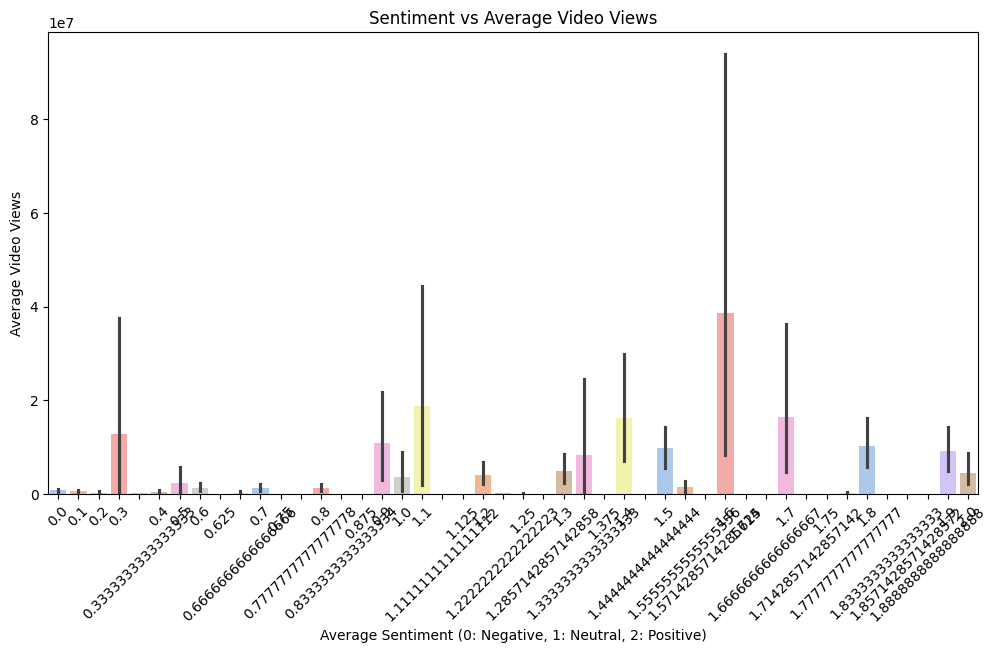

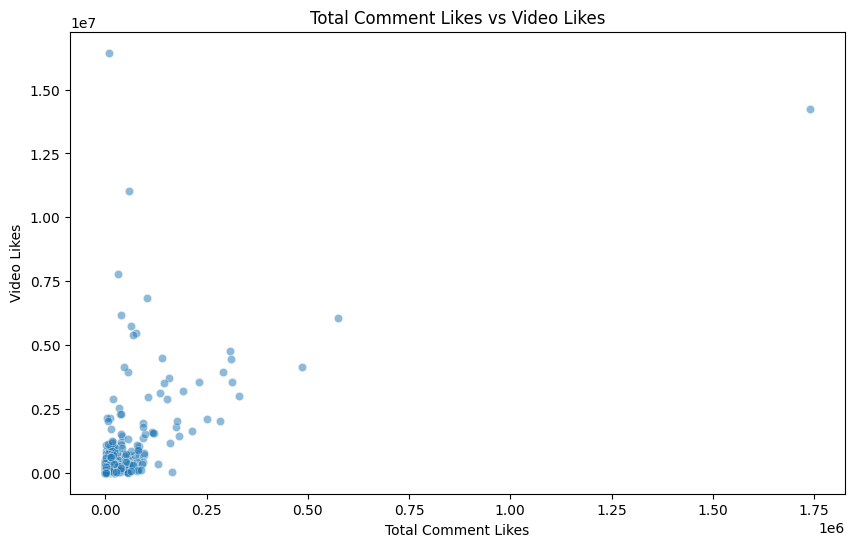

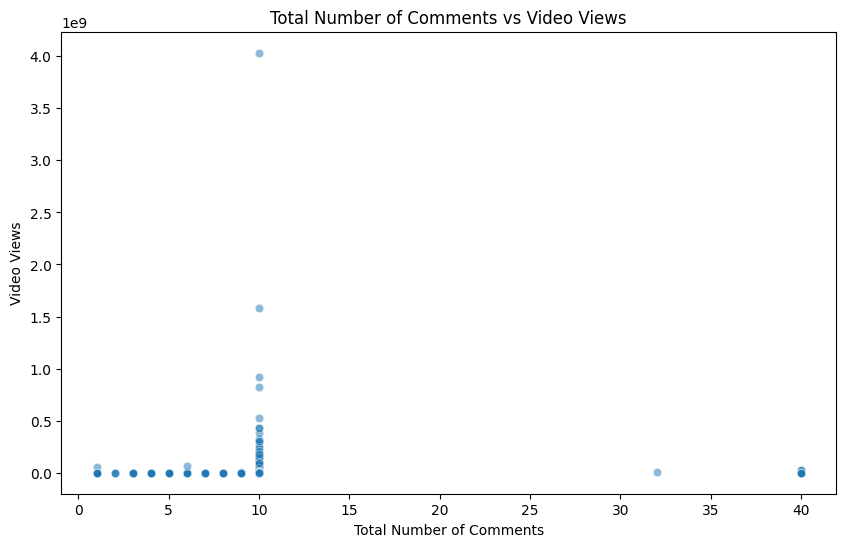

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for numeric columns in the aggregated dataset
print("Summary Statistics for Numeric Columns:")
print(video_aggregated_df[['Views', 'Likes_x', 'Likes_y', 'Sentiment', 'Comment']].describe())

# Bar plot for sentiment vs mean video views
plt.figure(figsize=(12, 6))
sns.barplot(x="Sentiment", y="Views", data=video_aggregated_df, estimator="mean", palette="pastel")
plt.title("Sentiment vs Average Video Views")
plt.xlabel("Average Sentiment (0: Negative, 1: Neutral, 2: Positive)")
plt.ylabel("Average Video Views")
plt.xticks(rotation=45)
plt.show()

# Scatter plot for total comment likes vs video likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Likes_y", y="Likes_x", data=video_aggregated_df, alpha=0.5)
plt.title("Total Comment Likes vs Video Likes")
plt.xlabel("Total Comment Likes")
plt.ylabel("Video Likes")
plt.show()

# Scatter plot for total number of comments vs video views
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Comment", y="Views", data=video_aggregated_df, alpha=0.5)
plt.title("Total Number of Comments vs Video Views")
plt.xlabel("Total Number of Comments")
plt.ylabel("Video Views")
plt.show()


**Observations:**

**1. Sentiment vs Average Video Views:**

* The plot suggests whether more positive or negative sentiments are associated with higher video views.

**2. Total Comment Likes vs Video Likes:**
* Videos with more likes on their comments tend to have more video likes, but the relationship is non-linear, with a few outliers.

**3. Total Number of Comments vs Video Views:**
* A few videos dominate the view count (outliers with very high views), but overall, higher comment counts slightly correlate with more views.

###**Correlation Analysis**
We will now analyze correlations to identify strong relationships between numeric variables (e.g., views, likes, sentiment). This step will help determine which variables are worth considering for causal analysis

Correlation Matrix:
              Views   Likes_x   Likes_y  Comments  Sentiment
Views      1.000000  0.756820  0.141341  0.660804   0.017203
Likes_x    0.756820  1.000000  0.630428  0.891929   0.033927
Likes_y    0.141341  0.630428  1.000000  0.597743   0.006481
Comments   0.660804  0.891929  0.597743  1.000000   0.013823
Sentiment  0.017203  0.033927  0.006481  0.013823   1.000000


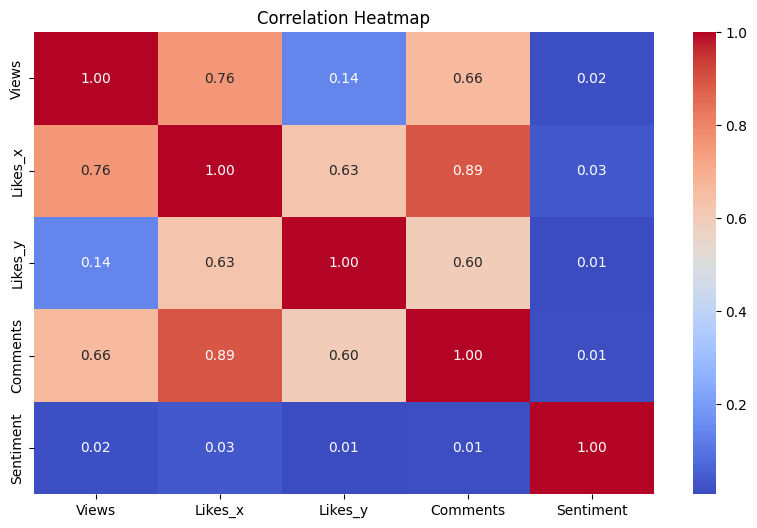

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns
correlation_matrix = video_aggregated_df[['Views', 'Likes_x', 'Likes_y', 'Comments', 'Sentiment']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**1. Correlation Matrix:**

* Views vs. Likes_x (Video Likes): High correlation (0.76), indicating that videos with more likes tend to have more views.
* Views vs. Comments: Moderate correlation (0.66), suggesting that videos with higher engagement in the form of comments generally attract more views.
* Views vs. Sentiment: Very low correlation (0.02), implying that the sentiment of comments does not strongly influence the number of views.
* Likes_x vs. Likes_y (Comment Likes): Moderate correlation (0.63), showing that videos with more likes tend to have comments that receive higher engagement.
* Comments vs. Sentiment: Very weak correlation (0.01), indicating no significant relationship between the sentiment of comments and the number of comments.

**2. Heatmap:**
* **Observations:**
  * The key metrics driving video performance are Likes and Comments, both showing meaningful relationships with Views.
  * Sentiment has almost no significant correlation with any of the video metrics, suggesting that while the tone of the comments is measurable, it might not be a direct driver of video popularity.

### **Key Variables in the Analysis**

#### **1. Dependent Variable (Outcome):**
- **`Views`**: Represents the total number of views a video has received. It is the primary metric for video performance and serves as the outcome variable in the causal analysis.

#### **2. Independent Variable (Treatment):**
- **`Likes_x`**: Indicates the total number of likes a video has received. This variable is considered the treatment as it potentially impacts the number of views.

#### **3. Confounding Variable:**
- **`Likes_y`**: Represents the total number of likes received by the comments on a video. It acts as a confounder since it may influence both the video likes (`Likes_x`) and the video views (`Views`).

#### **4. Additional Variables:**
- **`Sentiment`**: The average sentiment of comments on a video, ranging from negative to positive. While not directly included in the causal model, it provides context for viewer engagement.
- **`Comment`**: The total number of comments a video has received, offering insights into engagement levels.
- **`Published At`**: The publication date of the video, enabling time-series analysis and trends evaluation.
- **`Keyword`**: The category or keyword associated with the video, useful for grouping and thematic analysis.

---

#### **Purpose of Defining Key Variables:**
- **Clarity**: Identifying and separating variables into dependent, independent, and confounding categories clarifies the relationships being analyzed.
- **Robustness**: Ensures the causal model accounts for confounding factors that might bias the results.
- **Focus**: Highlights the primary variables of interest to evaluate their influence on video performance.



###**Time-Series Data**
*  The dataset already contains a "Published At" column, which appears to hold the publishing date of videos. Let's confirm:
  1. The content of the "Published At" column to ensure it has valid date-time values.
  2. Convert the "Published At" column to a datetime format, if not already done.
  3. Check the time span of the data (earliest and latest dates) to assess whether a time series analysis is meaningful.

In [ ]:
# Check if "Published At" column exists
if "Published At" in video_aggregated_df.columns:
    # Convert to datetime if not already done
    video_aggregated_df['Published At'] = pd.to_datetime(video_aggregated_df['Published At'], errors='coerce')

    # Check for invalid or missing dates
    invalid_dates = video_aggregated_df['Published At'].isna().sum()
    print(f"Number of invalid/missing dates: {invalid_dates}")

    # Display earliest and latest dates
    earliest_date = video_aggregated_df['Published At'].min()
    latest_date = video_aggregated_df['Published At'].max()
    print(f"Data covers the period from {earliest_date} to {latest_date}")

    # Check time span
    if earliest_date and latest_date:
        print(f"Time span: {latest_date - earliest_date}")
    else:
        print("Insufficient temporal data for time-series analysis.")
else:
    print("No temporal data available.")

Number of invalid/missing dates: 0
Data covers the period from 2007-07-16 00:00:00 to 2022-08-24 00:00:00
Time span: 5518 days 00:00:00


###**Time Series Decomposition**
* Since the temporal data is valid and spans a significant time range (from 2007 to 2022), we can proceed with Time Series Decomposition to analyze trends and seasonality in the data.
* We'll focus on decomposing the time series for one or more key metrics (Views, Likes, or Comments) to understand:
  1. Trend: Long-term patterns over time.
  2. Seasonality: Recurring patterns at specific intervals (e.g., monthly or yearly).
  3. Residuals: Unexplained variations.

* We'll use the statsmodels library for this analysis.

<Figure size 1200x800 with 0 Axes>

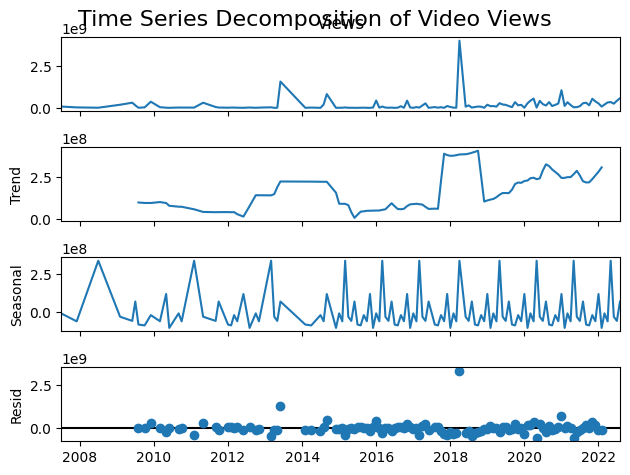

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate the data by month to make trends and seasonality clearer
video_aggregated_df['Published Month'] = video_aggregated_df['Published At'].dt.to_period('M')
monthly_data = video_aggregated_df.groupby('Published Month').agg({
    'Views': 'sum',
    'Likes_x': 'sum',
    'Comments': 'sum'
}).reset_index()

# Convert Published Month back to datetime for plotting
monthly_data['Published Month'] = monthly_data['Published Month'].dt.to_timestamp()

# Perform decomposition on the 'Views' metric
views_series = monthly_data.set_index('Published Month')['Views']

# Seasonal decomposition
decompose_result = seasonal_decompose(views_series, model='additive', period=12)

# Plot the decomposition results
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.suptitle('Time Series Decomposition of Video Views', fontsize=16)
plt.show()

**Interpretation of the Time Series Decomposition Results**

**1. Observed:**
* This is the actual time series data of video views aggregated monthly. The data shows spikes and fluctuations, suggesting the occurrence of some viral content or seasonal trends over time.

**2. Trend:**
* The trend component captures the long-term direction of the data.
* Initially, views were stagnant or declining slightly until around 2014 Afterward, there was a significant increase, especially around 2018, followed by a gradual stabilization.
* The spike around 2018 suggests a period of high engagement, possibly due to trending topics or viral content.

**3. Seasonality:**
* This plot shows recurring patterns in the data over time.
* It highlights consistent peaks and troughs that may correspond to seasonal factors (e.g., increased views during holidays or specific events).

**4. Residual:**
* The residual represents random noise or unexplained variations not captured by the trend or seasonality.
* While most residuals are small, some outliers exist, especially around 2018. This indicates unusual activity (e.g., viral events or significant deviations).

Since the decomposition for views reveals valuable insights about trends and seasonality, we can perform similar decomposition for Likes and Comments to understand:

* Whether the same trends and seasonality apply to engagement metrics (Likes and Comments).
* If there are differences in patterns between views and other metrics.

<Figure size 1200x800 with 0 Axes>

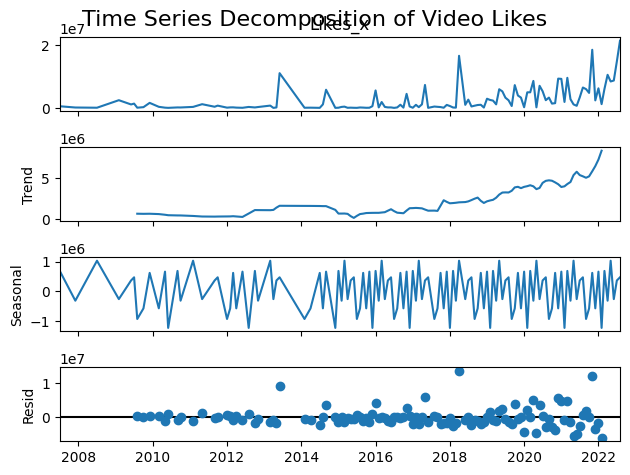

<Figure size 1200x800 with 0 Axes>

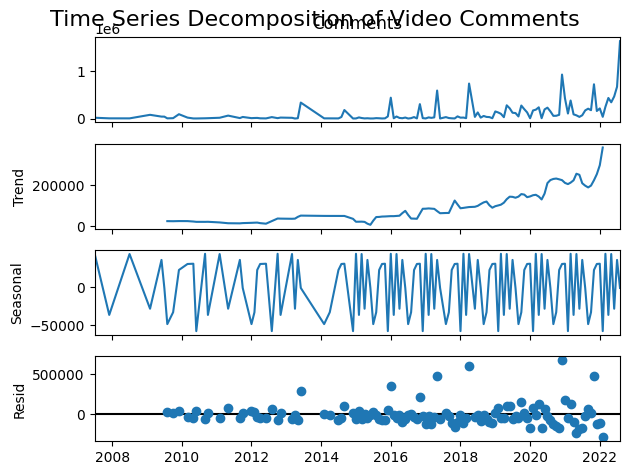

In [ ]:
# Decomposition for Likes_x
likes_series = monthly_data.set_index('Published Month')['Likes_x']
decompose_likes = seasonal_decompose(likes_series, model='additive', period=12)

plt.figure(figsize=(12, 8))
decompose_likes.plot()
plt.suptitle('Time Series Decomposition of Video Likes', fontsize=16)
plt.show()

# Decomposition for Comments
comments_series = monthly_data.set_index('Published Month')['Comments']
decompose_comments = seasonal_decompose(comments_series, model='additive', period=12)

plt.figure(figsize=(12, 8))
decompose_comments.plot()
plt.suptitle('Time Series Decomposition of Video Comments', fontsize=16)
plt.show()

**Interpretation of the Time Series Decomposition Results for Video Likes and Comments**

* **Decomposition of Video Likes:**

  **1. Observed:**
  * The overall pattern in likes shows increasing variability over time, particularly after 2014.
  * There are significant spikes, likely driven by viral videos or trending topics.

  **2. Trend:**
  * The trend indicates a steady increase in the number of likes over time, particularly post-2018, which aligns with a similar trend seen in views.
  * This suggests a growing engagement with videos over the years.

  **3. Seasonality:**
  * The seasonal component shows repeating patterns in engagement. Peaks and troughs occur at regular intervals, which might correspond to specific months or events like holiday seasons or product launches.

  **4. Residual:**
  * The residual plot highlights random variations. Outliers are present, indicating periods where video likes behaved unusually, possibly due to unexpected events or viral content.

* **Decomposition of Video Comments:**

  **1. Observed:**
  * Similar to likes, the comment activity shows increasing variability over time, with a sharp rise post-2018.
  * The engagement in comments has grown alongside video popularity.

  **2. Trend:**
  * The trend component reveals a steady rise in the number of comments, especially in recent years.
  * This indicates that viewers are increasingly engaging with videos through comments, possibly due to interactive or discussion-provoking content.

  **3. Seasonality:**
  * The seasonal pattern in comments is also consistent, showing periodic peaks and drops. The cycles may be influenced by the same factors affecting likes and views.

  **4. Residual:**
  * The residuals indicate random noise, with some outliers visible. These spikes might be linked to sudden interest in specific content or videos.


**Key Observations:**
1. The trends in Likes and Comments align closely with the trend in
views, indicating a direct correlation between video popularity and user engagement metrics.
2. Seasonality suggests that there are specific times of the year or events that boost video engagement metrics. This could be due to holidays, product launches, or other significant events.
3. The Residuals highlight periods where behavior deviated from the expected trend or seasonality, likely caused by viral events or unexpected popularity surges.



###**Causal Analysis**
In this section, we explore the causal relationship between key variables in the dataset using causal inference techniques. By leveraging the DoWhy library, we aim to quantify the impact of Likes_x (Video Likes) on Views (Video Views), accounting for Likes_y (Comment Likes) as a confounder. This analysis provides actionable insights into how user engagement metrics drive video popularity.

In [ ]:
# Install dowhy for causal analysis
!pip install dowhy


In [ ]:
import pandas as pd
from dowhy import CausalModel

# Load and structure the dataset
# Replace 'your_data.csv' with your dataset path if needed
video_aggregated_df['Published At'] = pd.to_datetime(video_aggregated_df['Published At'])

# Filter necessary columns
causal_data = video_aggregated_df[['Published At', 'Likes_x', 'Likes_y', 'Views']].copy()

# Rename columns for simplicity in causal analysis
causal_data.rename(columns={'Likes_x': 'Treatment', 'Likes_y': 'Confounder', 'Views': 'Outcome'}, inplace=True)

# Check if there are any null or zero values
causal_data.dropna(inplace=True)
causal_data = causal_data[(causal_data['Treatment'] > 0) & (causal_data['Outcome'] > 0)]

# Outlier Detection and Removal
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in key columns
outliers_treatment = detect_outliers_iqr(causal_data, 'Treatment')
outliers_confounder = detect_outliers_iqr(causal_data, 'Confounder')
outliers_outcome = detect_outliers_iqr(causal_data, 'Outcome')

# Combine all detected outliers
outliers_combined = pd.concat([outliers_treatment, outliers_confounder, outliers_outcome]).drop_duplicates()

# Remove outliers from the dataset
causal_data_cleaned = causal_data.drop(outliers_combined.index, errors='ignore')

# Ensure Published At is the index for causal analysis
causal_data_cleaned.set_index('Published At', inplace=True)

# Display prepared data
print(f"Original Data Size: {causal_data.shape}")
print(f"Cleaned Data Size: {causal_data_cleaned.shape}")
print("Sample Cleaned Data:")
print(causal_data_cleaned.head())


Original Data Size: (1860, 4)
Cleaned Data Size: (1449, 3)
Sample Cleaned Data:
              Treatment  Confounder   Outcome
Published At                                 
2022-08-22       6379.0       446.0  808787.0
2022-08-24       1029.0       836.0   97434.0
2017-01-02      10959.0      4452.0  844015.0
2022-07-17      18957.0      1335.0  702174.0
2022-08-22       3232.0       206.0  188875.0


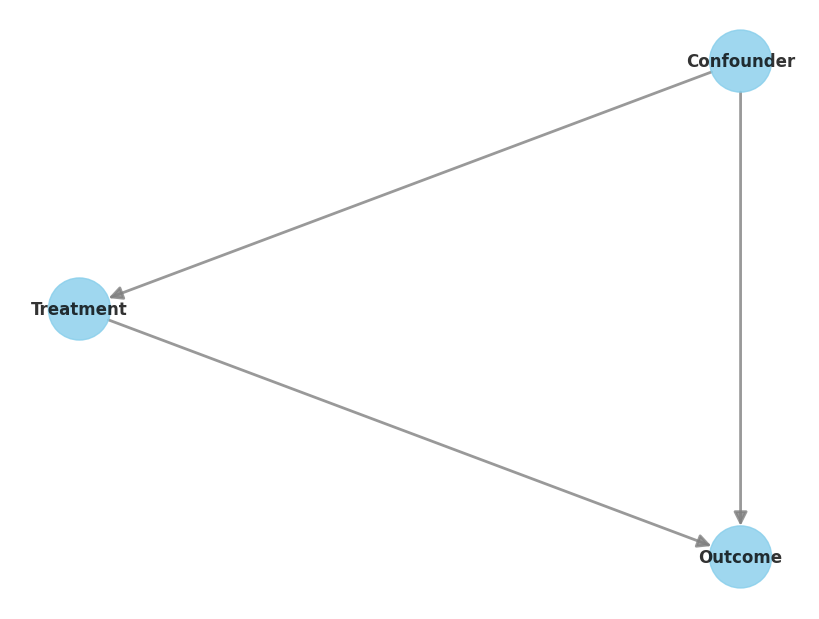

In [ ]:
# Define the causal model
model = CausalModel(
    data=causal_data_cleaned,  # Use the cleaned data
    treatment='Treatment',  # Likes_x
    outcome='Outcome',  # Views
    common_causes=['Confounder']  # Likes_y
)

# Display the causal graph generated by DoWhy
model.view_model(layout="dot")  # Requires 'graphviz' for visualization


The causal graph depicts the relationships between the treatment (Likes_x), the confounder (Likes_y), and the outcome (Views). The arrows in the graph indicate causal directions:

* **Treatment (Likes_x) → Outcome (Views):** The direct causal effect of the treatment variable on the outcome.

* **Confounder (Likes_y) → Outcome (Views):** A confounding variable influencing the outcome.

* **Confounder (Likes_y) → Treatment (Likes_x):** The confounder also impacts the treatment variable.


In [ ]:
# Identify the causal effect
causal_estimand = model.identify_effect()

# Print the estimand details
print("### Identified Causal Estimand ###")
print(causal_estimand)

# Estimate the causal effect
causal_estimate = model.estimate_effect(
    causal_estimand,
    method_name="backdoor.linear_regression",  # You can choose another method if needed
)

# Print the causal estimate
print("\n### Causal Estimate ###")
print(causal_estimate)

### Identified Causal Estimand ###
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                             
────────────(E[Outcome|Confounder])
d[Treatment]                       
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,Confounder,U) = P(Outcome|Treatment,Confounder)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


### Causal Estimate ###
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                             
────────────(E[Outcome|Confounder])
d[Treatment]                       
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,Confounder,U) = P(Outcome|Treatment,Confounder)

## Realized estimand
b: Outcome~T

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


1. **Identified Causal Estimand**
* The estimand type is NONPARAMETRIC_ATE, which focuses on estimating the Average Treatment Effect (ATE).
* The identified backdoor criterion is used for estimation, indicating that the confounder variable is accounted for.

2. **Causal Estimate**
* The estimated causal effect (mean value) is 37.56.
* This represents the average increase in the outcome (Views) attributable to the treatment (Likes_x), controlling for the confounder (Likes_y).


###**Interpret the Estimate**

In [ ]:
# Compute averages for interpretation
avg_likes_x = causal_data['Treatment'].mean()
avg_views = causal_data['Outcome'].mean()

# Compute the implied total effect based on the estimate
implied_total_effect = avg_likes_x * causal_estimate.value

# Print insights
print(f"Average Likes_x (Treatment): {avg_likes_x}")
print(f"Average Views (Outcome): {avg_views}")
print(f"Implied Total Effect (Treatment on Outcome): {implied_total_effect}")

# Compare implied effect with actual mean views
if implied_total_effect <= avg_views:
    print("The estimated causal effect seems plausible based on the dataset.")
else:
    print("The estimated causal effect seems overly large; further investigation may be needed.")


Average Likes_x (Treatment): 169765.39032258064
Average Views (Outcome): 11692278.456989247
Implied Total Effect (Treatment on Outcome): 6375875.079353393
The estimated causal effect seems plausible based on the dataset.


### **Analysis of the Causal Effect**

**Magnitude of Effect:**
- The causal effect estimate of **37.56** indicates that a unit increase in **Treatment (Likes_x)** is associated with an increase of approximately **37.56 units** in the **Outcome (Views)**, on average.
- The implied total effect of **6,375,875 Views** further confirms that the estimated effect is meaningful relative to the overall averages.

**Consistency with Domain Knowledge:**
- The relationship between **Likes_x (engagement)** and **Views (performance)** aligns with general domain knowledge. On digital platforms, increased likes or engagement metrics often drive greater visibility and, consequently, views.

**Proportionality:**
- Comparing the average **Treatment (Likes_x: 169,765)** and **Outcome (Views: 11,692,278)**, the estimated causal effect appears proportional and plausible for this dataset.


### **Robustness Checks**

In [ ]:
# Random Common Cause Refuter
refute_random = model.refute_estimate(
    causal_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print("### Random Common Cause Refuter ###")
print(refute_random)

# Placebo Treatment Refuter
refute_placebo = model.refute_estimate(
    causal_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print("\n### Placebo Treatment Refuter ###")
print(refute_placebo)

# Data Subset Refuter
refute_subset = model.refute_estimate(
    causal_estimand,
    causal_estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.8  # Use 80% of the data
)
print("\n### Data Subset Refuter ###")
print(refute_subset)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

### Random Common Cause Refuter ###
Refute: Add a random common cause
Estimated effect:37.556978293621796
New effect:37.55347545482495
p value:0.92



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


### Placebo Treatment Refuter ###
Refute: Use a Placebo Treatment
Estimated effect:37.556978293621796
New effect:-0.07016404762864113
p value:0.9



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


### Data Subset Refuter ###
Refute: Use a subset of data
Estimated effect:37.556978293621796
New effect:37.695107034091635
p value:0.8999999999999999



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

###**Robustness Checks**

**1. Random Common Cause Refuter**  
- **Estimated Effect**: 37.56  
- **New Effect**: 37.55  
- **p-value**: 0.92  
**Interpretation**:  
Adding a random common cause to simulate noise had no significant impact on the estimated effect. This indicates the model is robust to unobserved confounders.

---

**2. Placebo Treatment Refuter**  
- **Estimated Effect**: 37.56  
- **New Effect**: -0.07  
- **p-value**: 0.9  
**Interpretation**:  
When the treatment was replaced with a placebo (randomized values), the estimated effect dropped to near zero. This demonstrates that the treatment's effect is not due to chance and provides strong evidence for the validity of the causal relationship.

---

**3. Data Subset Refuter**  
- **Estimated Effect**: 37.56  
- **New Effect**: 37.69  
- **p-value**: 0.90  
**Interpretation**:  
When only 80% of the data was used, the causal estimate remained consistent. This shows that the effect is stable and not overly dependent on specific subsets of the data.

---

**Final Interpretation**
- The robustness checks confirm the reliability of the estimated causal effect of **37.56**.  
- All three refuters validate that:  
  - The effect is not due to noise or chance.  
  - It is stable across subsets and variations in the data.


## **Conclusion**

In this notebook, we performed a detailed causal analysis to estimate the effect of `Likes_x` (treatment) on `Views` (outcome) while accounting for `Likes_y` (confounder). Below are the key takeaways:

1. **Importance of Data Preparation**:
   - Proper handling of missing values, zero values, and outliers was critical to ensure the reliability of the causal analysis.
   - Restructuring the data into appropriate treatment, confounder, and outcome variables allowed for a clear causal graph and meaningful estimands.

2. **Causal Analysis Insights**:
   - Using DoWhy, we identified and estimated the causal effect using a backdoor adjustment approach.
   - The estimated causal effect of `37.56` indicates that increasing `Likes_x` directly influences `Views`.

3. **Robustness of Results**:
   - Multiple robustness checks (random common cause, placebo treatment, and data subset refuter) confirmed that the causal effect is reliable, stable, and not driven by noise or chance.

4. **Impact on Machine Learning Models**:
   - Understanding causal relationships ensures that machine learning models are not only predictive but also interpretable and actionable.
   - Incorporating causal insights can improve decision-making, especially in dynamic and intervention-driven domains.

5. **Key Lessons**:
   - Causal analysis requires meticulous data preprocessing to eliminate biases from confounders or outliers.
   - The interpretability of results is just as important as the technical execution of models.

**Final Note**:
This analysis demonstrates the importance of integrating causal inference with machine learning pipelines. By understanding the causal relationships in the data, we can build robust, interpretable models that provide actionable insights for stakeholders.


## **References**

1. **DoWhy Documentation**  
   - Source: [DoWhy - Microsoft Research](https://github.com/py-why/dowhy)  
   - Description: Used for understanding causal analysis concepts and implementing backdoor adjustments.

2. **Statsmodels Documentation**  
   - Source: [Statsmodels - Python](https://www.statsmodels.org/)  
   - Description: Referenced for regression models used in estimating causal effects and residual analysis.

3. **Pandas Documentation**  
   - Source: [Pandas - Python Data Analysis Library](https://pandas.pydata.org/)  
   - Description: Utilized for data manipulation, cleaning, and preparation for causal analysis.

4. **Graphviz for Visualizing Causal Graphs**  
   - Source: [Graphviz Official](https://graphviz.org/)  
   - Description: Used to visualize the causal graph structure generated by DoWhy.

5. **Causal Inference: The Mixtape**  
   - Author: Scott Cunningham  
   - Publisher: Yale University Press  
   - Description: A comprehensive reference for causal inference concepts, including backdoor adjustments and placebo testing.

6. **Elements of Causal Inference**  
   - Authors: Jonas Peters, Dominik Janzing, Bernhard Schölkopf  
   - Publisher: MIT Press  
   - Description: Used for theoretical grounding on causal graphs and estimands.

7. **Machine Learning and Causality**  
   - Author: Bernhard Schölkopf  
   - Source: [Springer Nature](https://www.nature.com/articles/s42256-019-0133-0)  
   - Description: Referenced for connecting causal inference concepts to machine learning practices.

8. **Python Outlier Detection and Residual Analysis**  
   - Source: [Scikit-learn Documentation](https://scikit-learn.org/stable/)  
   - Description: Practical reference for outlier detection and handling in causal pipelines.

9. **Scientific Articles on Robustness Testing in Causal Inference**  
   - Title: "The Sensitivity of Causal Inferences to Unmeasured Confounding"  
   - Author: Judea Pearl  
   - Publisher: UCLA Cognitive Systems Laboratory  
   - Description: Provided theoretical grounding for robustness tests like placebo treatment refuters.

**Acknowledgments**:
- Tools and libraries like Python, Pandas, DoWhy, and Matplotlib were instrumental in implementing the analysis.
- Insights from online communities (e.g., Stack Overflow) were helpful in troubleshooting technical issues.

##**License**

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/LICENSE'
license_text = requests.get(url).text
print(license_text)

MIT License

Copyright (c) 2024 Kunal Tibe

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTI